# Regression Analysis

- Simple regression(1 variable) - omits some important factors, which will result in an estimated error (Usefull but not perfect)

Regression model can be written as -- Y = alpha + beta*X + error

In [3]:
# !pip install statsmodels

In [4]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data/Housing.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.shape, data.size

((1460, 81), 118260)

In [8]:
data[['SalePrice', 'LotArea']]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


## Univariate Regression

In [70]:
Y = data['SalePrice'][:50]
X = data['LotArea'][:50]

In [71]:
X[:10]

0     8450
1     9600
2    11250
3     9550
4    14260
5    14115
6    10084
7    10382
8     6120
9     7420
Name: LotArea, dtype: int64

In [72]:
Y[:10]

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

Ploting House price with Lot size

Text(0.5, 0, 'Lot size in square feet')

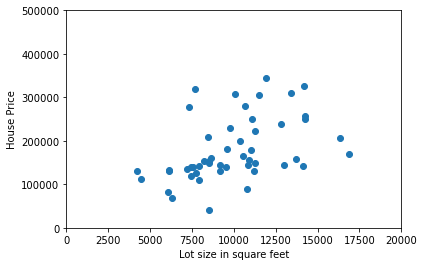

In [73]:
plt.scatter(X, Y)
plt.axis([0, 20000, 0, 500000])
plt.ylabel('House Price')
plt.xlabel('Lot size in square feet')

## R square 

- In case of sample observation errors(distance of the data point from best fitting line) are called residuals

- The best fitting line minimizes the sum of the squared residuals
- The cofficients found with this technique are called OSL estimates (Ordinary least square estimates)
- Not all regressions are not equal and to compare explanatory power we use **r square**
- Total sum of square(TSS) provides a sense of the vaiability of data = Sum(x - mean(x))^2 


**R square = 1 - SSR/(Total sum of square(TSS))**
- R square varies between 0%-100%. The higher it is, the more predictive power the model has
- R square > 30% = solid indicators

In [74]:
 X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [75]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     11.92
Date:                Fri, 13 Jan 2023   Prob (F-statistic):            0.00117
Time:                        17:25:45   Log-Likelihood:                -624.54
No. Observations:                  50   AIC:                             1253.
Df Residuals:                      48   BIC:                             1257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.83e+04   3.36e+04      2.035      0.047     822.325    1.36e+05
LotArea       11.2211      3.250      3.453      0.001       4.686      17.756
==============================================================================
Omnibus:                        4.899   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.313
Skew:                           0.719   Prob(JB):                        0.116
Kurtosis:                       3.069   Cond. No.                     3.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Alpha, Beta, R^2

In [76]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [77]:
slope

11.221120486281864

In [78]:
intercept

68296.82524209737

In [79]:
r_value

0.4460266962426154

In [80]:
r_value**2

0.19893981376110229

In [81]:
p_value

0.001168788759924173

In [82]:
std_err

3.2500296797098858

Here r square is 19.9% 